In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------

def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    # NxN matrix with random inters -1,1
    state = 2*np.random.randint(2, size=(1,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    
    #Config is the NxN spin matrix configuration
    #In each iteration NxN updates

    for i in range(N):
        b = np.random.randint(0, N)
        s =  config[0,b]        
        nb = config[0,(b+1)%N] + config[0,(b-1)%N]
        #print nb
        cost = 2*s*nb
        if cost < 0:
            s *= -1
        elif rand() < np.exp(-cost*beta):
            s *= -1
        config[0,b] = s
    #print config
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(N):
        S = config[0,i]
        nb = config[0,(i+1)%N] + config[0,(i-1)%N]
        #print nb
        energy += -nb*S
    return energy/2.    #Divide by 4 ensures , avoid multiple counting


def calcMag(config):
    '''Magnetization of a given configuration'''
    #magnetiation is just sum of all spins \sum_{i} S_i
    mag = np.sum(np.sum(config))
    return mag

In [3]:
## change the parameter below if you want to simulate a smaller system
nt      = 2**4        # number of temperature points
N       = 2**4        # size of the lattice, N
eqSteps = 2**8       # number of MC sweeps for equilibration
mcSteps = 2**8       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N*1), 1.0/(mcSteps*mcSteps*N*1)  

#tm is the transition temperature
T=np.linspace(.01, 4, nt)

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)


#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

#m is the temperature index

for m in range(len(T)):
    
    config = initialstate(N)
    iT=1.0/T[m]; iT2=iT*iT;
    
    for l in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    #Calculate quantities post equilibriation
    E1 = M1 = E2 = M2 = 0
    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene                 #Cumulative energy 
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1     #Weighing for MC averages. 
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT2      

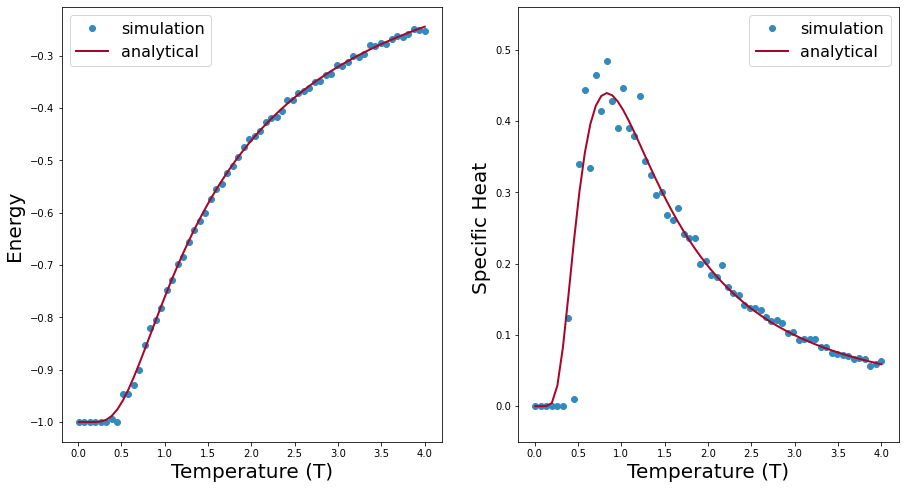

In [4]:
f = plt.figure(figsize=(15, 8)); # plot the calculated values    

sp =  f.add_subplot(1, 2, 1 );
plt.plot(T, Energy, 'o', color="#348ABD", label='simulation');
plt.plot(T, -np.tanh(1.0/T), color="#A60628", lw=2,label='analytical')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20); plt.legend(fontsize=16)


sp =  f.add_subplot(1, 2, 2 );
plt.plot(T, SpecificHeat, 'o', color="#348ABD", label='simulation');
plt.plot(T, (1.0/T**2)*(np.cosh(1.0/T))**(-2), color="#A60628", lw=2,label='analytical')
plt.xlabel("Temperature (T)", fontsize=20); plt.ylim([-0.05, .56])
plt.ylabel("Specific Heat ", fontsize=20);  plt.legend(fontsize=16)